<a href="https://colab.research.google.com/github/CintiaYYS/DataScience/blob/main/TF_CintiaYamada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho final Python com Data Science - Cintia Yurie Yamada

Este trabalho tem como finalidade aplicar os conceitos apresentados em aula.
A base de dados escolhida é referente aos passageiros do Titanic. A base foi retirada do site https://www.kaggle.com/c/titanic/data.

Sabendo do histórico da tragédia que foi a primeira e única viagem do Titanic, há alguns fatores que aumentavam a possibilidade de sobreviver, uma vez que não havia botes o suficiente para salvar todos os passageiros. Assim, o objetivo final deste trabalho é analisar os fatores que influenciaram a sobrevivência dos passageiros.

In [ ]:
#Aqui serão colocados os import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Carregando o arquivo que será usado para treinar o modelo de classificação

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Verificando e analisando quais colunas serão analisadas.

Após analisar as colunas, algumas não serão utilizadas na classificação, assim, deverá ser feito um filtro para que apenas as colunas utilizadas sejam armazenadas

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Verificando o conjunto de valores possíveis para cada coluna
for coluna in df.columns:
  print("------- ",coluna," -------")
  print(df[coluna].unique(),"\n\n\n")

-------  PassengerId  -------
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 

In [ ]:
# Após analisar os valores de cada coluna, podemos descartar algumas como 'PassengerId' e 'Name'
# Assim, vamos aplicar uma máscara para poder filtrar apenas as colunas de interesse

colunas_interesse = ['Survived', 'Pclass','Sex', 'Age', 'SibSp','Parch']

#Aplicando a máscara ao dataframe
df = df[colunas_interesse]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


#Limpeza de dados

Analisando os dados do dataframe, podemos verificar que há um conjunto de valores possíveis para cada coluna:

Survived : [0 1]  (sobrevivente - 1, morto - 0)

Pclass:[3 1 2]  (primeira (1) , segunda (2) e tericeira (3) classe)

Sex: ['male' 'female'] (masculino e feminino, respectivamente)

Age: há valores não numéricos, assim, é preciso analisar as linhas. Primeiro, será feita uma rápida análise de sobreviventes e mortos para os passageiros que não tem registro da idade. E em seguida, verificar o impacto desses passageiros na análise da idade de forma geral.

Para as colunas SibSp e Parch, apesar de numéricas, não fica claro qual a classificação e o significado de cada número, assim, para este trabalho, não serão levadas em conta.

SibSp: [1 0 3 4 2 5 8] ( Define se o passageiro é irmão/irmã/meio-irmão/meia-irmã, se é marido/esposa de outro passageiro. Noivo e noiva não foram considerados)

Parch: [0 1 2 5 3 4 6] (Defini se um passageiro tem filho/filha, enteado/enteada, mãe/pai de outro passageiro)



O foco da análise é saber se o passageiro sobreviveu ou não, assim, é interessante colocar a coluna Survived como índice para poder acessar de forma rápida os sobreviventes e os não sobreviventes.

In [ ]:
#setando a coluna Survived como índice
df.set_index('Survived',inplace=True)

In [ ]:
#Análise de forma geral, ou seja, com os passageiros cuja idade não está registrada

#Gerando um dataframe para armazenar os passageiros que não tem idade registrada
semIdade = df.where(df["Age"].isna())

print("Analisando em relação às demais colunas: PClass, Sex, SibSp e Parch \n")
print("Geral: \n")

smCi = len(df.loc[1][df.loc[1]['Sex'] == 'female'])
shCi = len(df.loc[1][df.loc[1]['Sex'] == 'male'])

print("Sobreviventes mulheres: ", smCi)
print("Sobreviventes homens: ",shCi)

nsmCi = len(df.loc[0][df.loc[0]['Sex'] == 'female'])
nshCi = len(df.loc[0][df.loc[0]['Sex'] == 'male'])

print("Não sobreviventes mulheres: ", nsmCi)
print("Não sobreviventes homens: ",nshCi)

print("\nPassageiros sem registro de idade: ")

smSi = len(semIdade.loc[1][semIdade.loc[1]['Sex'] == 'female'])
shSi = len(semIdade.loc[1][semIdade.loc[1]['Sex'] == 'male'])

print("Sobreviventes mulheres: ", smSi)
print("Sobreviventes homens: ",shSi)

nsmSi =  len(semIdade.loc[0][semIdade.loc[0]['Sex'] == 'female'])
nshSi = len(semIdade.loc[0][semIdade.loc[0]['Sex'] == 'male'])

print("Não sobreviventes mulheres: ",nsmSi)
print("Não sobreviventes homens: ",nshSi)

print("\nPorcentagens: (relação dos sem idade / com idade)")
print("MUlheres\n")
print("Sobreviventes: {:.2f}%".format((smSi/smCi)*100))
print("Não sobreviventes: {:.2f}%".format((nsmSi/nsmCi)*100))

print("\nHomens\n")
print("Sobreviventes: {:.2f}%".format((shSi/shCi)*100))
print("Não sobreviventes: {:.2f}%".format((nshSi/nshCi)*100))


Analisando em relação às demais colunas: PClass, Sex, SibSp e Parch 

Geral: 

Sobreviventes mulheres:  233
Sobreviventes homens:  109
Não sobreviventes mulheres:  81
Não sobreviventes homens:  468

Passageiros sem registro de idade: 
Sobreviventes mulheres:  36
Sobreviventes homens:  16
Não sobreviventes mulheres:  17
Não sobreviventes homens:  108

Porcentagens: (relação dos sem idade / com idade)
MUlheres

Sobreviventes: 15.45%
Não sobreviventes: 20.99%

Homens

Sobreviventes: 14.68%
Não sobreviventes: 23.08%


#Como a porcentagem dos passageiros que não possuem idade resgitrada representam mais de 10%, sejam de sobreviventes ou não, os registros continuarão durante o estudo

#Plotando gráficos para facilitar a visualização dos dados

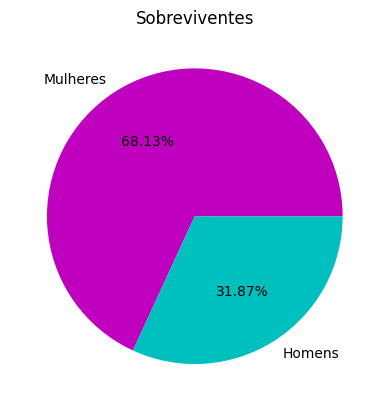

In [ ]:
#Sobreviventes em relação a Sex, PClass, Age, SibSp e Parch

#Neste momento,será feita a análise dos sobreviventes em relação ao sexo. Assim, será utilizado índices multi-nível
#Índices serão Survived e Sex
sobreviventes = df.reset_index()
sobreviventes.set_index(['Survived','Sex'],inplace=True)

mS = len(sobreviventes.loc[1].loc['female'])
hS = len(sobreviventes.loc[1].loc['male'])

plt.pie([mS,hS],labels=['Mulheres','Homens'],colors=['m','c'],autopct="%1.2f%%")
plt.title("Sobreviventes")
plt.show()


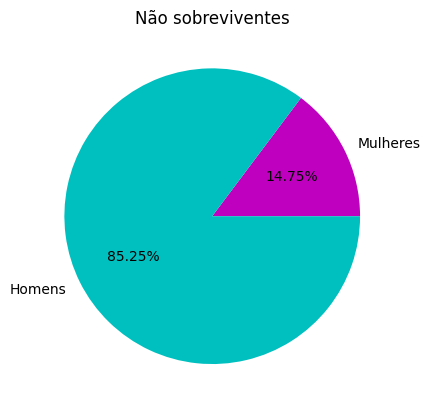

In [ ]:
mnS = len(sobreviventes.loc[0].loc['female'])
hnS = len(sobreviventes.loc[0].loc['male'])

plt.pie([mnS,hnS],labels=['Mulheres','Homens'],colors=['m','c'],autopct="%1.2f%%")
plt.title("Não sobreviventes")
plt.show()



#Em relação ao Sexo, pode-se afirmar que entre os não sobreviventes, a maioria eram homens e entre os sobreviventes, a maioria eram mulheres. Assim, o Sexo pode ser usado como um dos indicadores para cálculo da chance de sobrevivência.

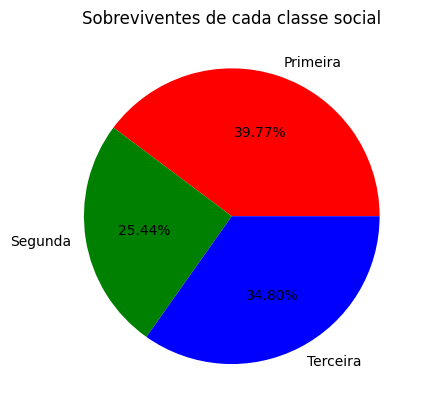

In [ ]:
#Verificando os sobreviventes de acordo com a classe social, segundo a passagem comprada

classe = dict()

for i in sobreviventes.Pclass.unique():
  classe.update({i:len(sobreviventes.loc[1].loc[sobreviventes.loc[1].Pclass == i])})

classe = sorted(classe.items())
classe = [x[1] for x in classe]

plt.pie(classe,labels=["Primeira","Segunda","Terceira"],colors=["r",'g','b'],autopct="%1.2f%%")
plt.title("Sobreviventes de cada classe social")
plt.show()

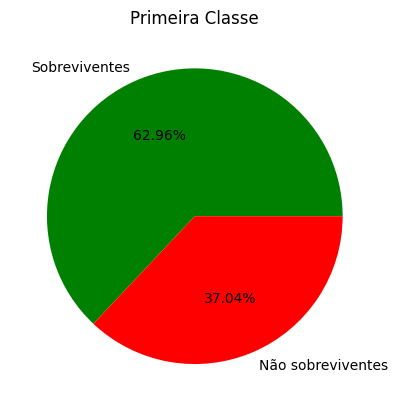

In [ ]:
#Verificando os sobreviventes e não sobreviventes de acordo com cada classe social, segundo a passagem comprada
#Primeira Classe

#Passageiros da primeira classe
Pc1 = df[df.Pclass == 1]
sPc1 = Pc1.loc[1]
nsPc1 = Pc1.loc[0]


plt.pie([len(sPc1),len(nsPc1)],labels=["Sobreviventes","Não sobreviventes"],colors=["g","r"],autopct="%1.2f%%")
plt.title("Primeira Classe")
plt.show()


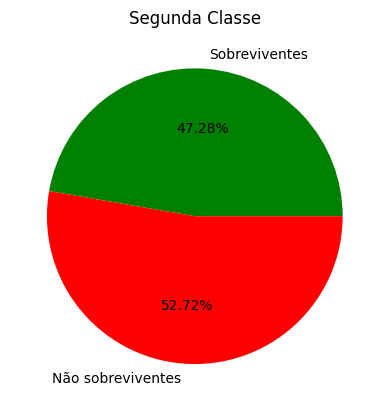

In [ ]:
#Verificando os sobreviventes e não sobreviventes de acordo com cada classe social, segundo a passagem comprada
#Segunda Classe

#Passageiros da segunda classe
Pc2 = df[df.Pclass == 2]
sPc2 = Pc2.loc[1]
nsPc2 = Pc2.loc[0]


plt.pie([len(sPc2),len(nsPc2)],labels=["Sobreviventes","Não sobreviventes"],colors=["g","r"],autopct="%1.2f%%")
plt.title("Segunda Classe")
plt.show()

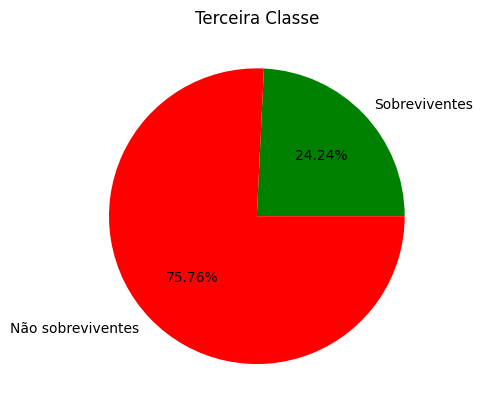

In [ ]:
#Verificando os sobreviventes e não sobreviventes de acordo com cada classe social, segundo a passagem comprada
#Terceira Classe

#Passageiros da terceira classe
Pc3 = df[df.Pclass == 3]
sPc3 = Pc3.loc[1]
nsPc3 = Pc3.loc[0]


plt.pie([len(sPc3),len(nsPc3)],labels=["Sobreviventes","Não sobreviventes"],colors=["g","r"],autopct="%1.2f%%")
plt.title("Terceira Classe")
plt.show()

#Sobre as classes sociais, segundo a classificação da passagem comprada, quando analisado apenas os sobreviventes e depois separados em classes, não há tanta discrepância entre as porcentagens (39%,25% e 34%). Porém, analisando cada classe separadamente, foi possível notar que dentre os passageiros da mesma classe, a primeira classe apresenta maior propabilidade de sobrevivênvia (62.96%), enquanto o passageiro da terceira classe apresenta 24% de sobrevivência.

Por isso, a classe social é um fator indicativo para classificar os passageiros em sobreviventes ou não sobreviventes.

# Como o atributo idade pode ter uma distribuição muito grande, há pouca probabilidade de ter um grupo de pessoas com a mesma idade, foi definida uma função que classifica a idade do passageiro em uma faixa etária.

Logo, uma nova coluna é adicionada ao dataframe para poder agrupar o passageiro.

In [ ]:

print("Passageiro mais novo",df.Age.min())
print("Passageiro mais velho",df.Age.max())
print("Média da idade dos passageiros",df.Age.mean())

Passageiro mais novo 0.42
Passageiro mais velho 80.0
Média da idade dos passageiros 29.69911764705882


In [ ]:
def faixaEtaria(item):
  if item <= 10:
    return 0
  elif item <= 20:
    return 1
  elif item <= 30:
    return 2
  elif item <= 40:
    return 3
  elif item <= 50:
    return 4
  elif item <= 60:
    return 5
  elif np.isnan(item):
    return 7
  else: return 6

In [ ]:
# Aplicando a função que classifica o passageiro por idade, para que os passageiros passem a pertencer a um grupo
#dependendo da idade
sobreviventes['AgeGroup'] = sobreviventes['Age'].apply(faixaEtaria)

In [ ]:
sobreviventes.head()

Pclass   Age  SibSp  Parch  AgeGroup
Survived Sex                                         
0        male         3  22.0      1      0         2
1        female       1  38.0      1      0         3
         female       3  26.0      0      0         2
         female       1  35.0      1      0         3
0        male         3  35.0      0      0         3

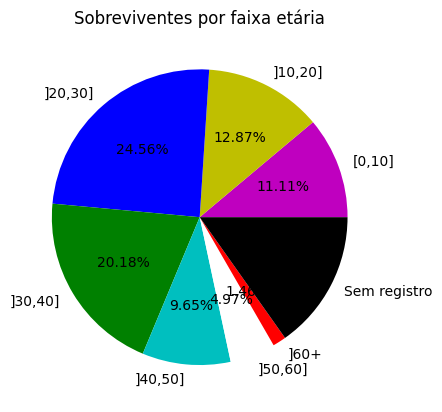

In [ ]:
faixa = dict()

for i in sobreviventes.AgeGroup.unique():
  faixa.update({i:len(sobreviventes.loc[1].loc[sobreviventes.loc[1].AgeGroup == i])})

faixa = sorted(faixa.items())
faixa = [x[1] for x in faixa]

plt.pie(faixa,labels=["[0,10]","]10,20]","]20,30]","]30,40]","]40,50]","]50,60]","]60+","Sem registro"],colors=["m",'y','b','g','c','w','r','k'],autopct="%1.2f%%")
plt.title("Sobreviventes por faixa etária")
plt.show()

#Utilizando um histograma para comprarar as faixas etárias

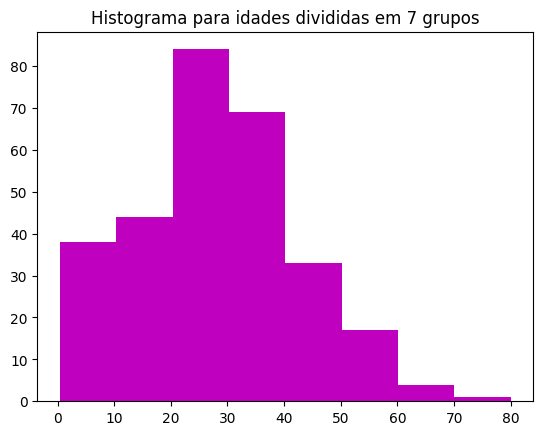

In [ ]:

plt.hist(sobreviventes.loc[1].Age,bins=8,color='m')
plt.title("Histograma para idades divididas em 7 grupos")
plt.show()

#Agora cruzandos os fatores em relação aos sobreviventes:

Mulheres, da primeira classe social, com idade entre 20 e 30 anos.


In [ ]:
mPc12030 = df.reset_index()
mPc12030 = mPc12030.set_index(["Survived","Sex","Pclass"])
mPc12030 = mPc12030.loc[1].loc['female'].loc[1]
mPc12030 = mPc12030.where((mPc12030.Age >=20 )&(mPc12030.Age <=30 )).dropna()
survived = len(mPc12030)

#Verificando o total de mulheres da primeira classe com idade entre 20 e 30
mPc12030Total = df.reset_index()
mPc12030Total = mPc12030Total.set_index(["Sex","Pclass"])
mPc12030Total = mPc12030Total.loc['female'].loc[1]
mPc12030Total = mPc12030Total.where((mPc12030Total.Age >=20 )&(mPc12030Total.Age <=30 )).dropna()
passageirasTotal = len(mPc12030Total)

print("Das ",passageirasTotal," passageiras da primeira classe com idade de 20 a 30 anos, ",survived," sobreviveram")
print("Porcetagem de chance de sobreviver: ",(survived/passageirasTotal))


Das  21  passageiras da primeira classe com idade de 20 a 30 anos,  20  sobreviveram
Porcetagem de chance de sobreviver:  0.9523809523809523


## Conclusão inicial: as mulheres da primeira classe com idade entre 20 e 30 anos tem mais de 95% de chance de sobreviver.